In [1]:
PATH='/home/kirana/Documents/phd/exp3_autoencoder'
DATAPATH='/home/kirana/Documents/final_dissertation_final/experiments/datasets/ml-1m'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn

In [3]:
[df, df_train,df_valid,df,df_ratings,idx_to_user,\
             idx_to_movie,movie_to_idx,user_to_idx]=pickle.load(open(f'{DATAPATH}/reads.pkl','rb'))

In [4]:
df.shape

(1000209, 20)

In [5]:
df.head().T

,648724,203881,243394,788507,301066
userId,3908,1254,1467,4717,1789
itemId,2347,1541,2617,3754,2997
rating,4,2,3,3,5
timestamp,965941231,974823280,977173059,963502544,974700402
gender,M,F,M,M,M
age,25,18,25,45,1
occupation,0,1,5,17,10
zip,10021,02144,97007,48310,19116
title,"Pope of Greenwich Village, The (1984)",Addicted to Love (1997),"Mummy, The (1999)","Adventures of Rocky and Bullwinkle, The (2000)",Being John Malkovich (1999)
genre,Action,Comedy|Romance,Action|Adventure|Horror|Thriller,Animation|Children's|Comedy,Comedy


In [6]:
occupation_to_idx={j:i+1 for i,j in enumerate(df['occupation'].unique())}
age_to_idx={j:i+1 for i,j in enumerate(df['age'].unique())}
gender_to_idx={j:i+1 for i,j in enumerate(df['gender'].unique())}

In [7]:
df['gender_idx']=[gender_to_idx.get(i) for i in df['gender']]
df['age_idx']=[age_to_idx.get(i) for i in df['age']]
df['occupation_idx']=[occupation_to_idx.get(i) for i in df['occupation']]

In [8]:
df['gender_idx'].value_counts()

1    753769
2    246440
Name: gender_idx, dtype: int64

In [9]:
df['occupation_idx'].value_counts()

8     131032
1     130499
12    105425
2      85351
4      72816
7      60397
15     57214
6      50068
11     49109
10     46021
18     37205
14     31623
5      23290
16     22951
3      21850
13     20563
9      14904
20     13754
17     12086
19     11345
21      2706
Name: occupation_idx, dtype: int64

In [10]:
df['genre_idx'].value_counts()

5      116883
14     111423
2       42712
16      42245
25      29170
53      26759
38      22563
58      18248
70      17851
69      17783
28      14656
22      14309
36      13970
1       12311
23      12224
13      11870
11      11069
6       10446
77      10382
60       9681
47       9311
61       9077
75       8851
7        8649
65       8220
32       7946
4        7870
72       7467
73       7438
86       6809
        ...  
254       182
274       168
252       168
237       162
266       160
245       144
268       135
276       130
267       130
278       102
282        98
230        85
293        77
291        68
281        67
296        65
283        63
292        62
284        55
298        44
299        44
277        43
295        41
280        41
294        30
297        29
285        27
279         5
300         2
301         1
Name: genre_idx, Length: 301, dtype: int64

In [11]:
df_train=df.loc[df['random_dstype']=='train']
df_valid=df.loc[df['random_dstype']!='train']

In [12]:
df_train.head().T

,648724,203881,243394,788507,301066
userId,3908,1254,1467,4717,1789
itemId,2347,1541,2617,3754,2997
rating,4,2,3,3,5
timestamp,965941231,974823280,977173059,963502544,974700402
gender,M,F,M,M,M
age,25,18,25,45,1
occupation,0,1,5,17,10
zip,10021,02144,97007,48310,19116
title,"Pope of Greenwich Village, The (1984)",Addicted to Love (1997),"Mummy, The (1999)","Adventures of Rocky and Bullwinkle, The (2000)",Being John Malkovich (1999)
genre,Action,Comedy|Romance,Action|Adventure|Horror|Thriller,Animation|Children's|Comedy,Comedy


In [13]:
df_train.shape,df_valid.shape

((900188, 21), (100021, 21))

### Add the autoencoder features

In [14]:
import pickle

In [15]:
[df_train_user_autoenc,df_valid_user_autoenc,user_mtx_1_weights,user_mtx_2_weights,df_train_user_autoenc_linear,df_valid_user_autoenc_linear]=\
    pickle.load(open(f'{DATAPATH}/inter/user_autoenc_weights.pkl','rb'))

In [16]:
[df_train_item_autoenc, df_valid_item_autoenc,item_mtx_1_weights,item_mtx_2_weights,df_train_item_autoenc_linear, df_valid_item_autoenc_linear]=\
    pickle.load(open(f'{DATAPATH}/inter/item_autoenc_weights.pkl','rb'))

In [17]:
df_train_user_autoenc.shape, type(df_train_user_autoenc),df_train_user_autoenc.head()

((6041, 11),
 pandas.core.frame.DataFrame,
    user_idx  user_autoenc0  user_autoenc1  user_autoenc2  user_autoenc3  \
 0         0      -0.918095       2.296391       0.263371      -0.011968   
 1         1      -1.694891      -0.151930       1.124974      -1.841133   
 2         2       0.807896      -1.376931       0.162299       0.080092   
 3         3      -0.736317      -0.517018       1.213105      -1.961564   
 4         4      -1.399151       0.328619      -1.665964      -1.062431   
 
    user_autoenc4  user_autoenc5  user_autoenc6  user_autoenc7  user_autoenc8  \
 0      -0.804040      -0.389131       0.454120      -3.545166       2.439914   
 1      -2.112378      -1.080319       1.374260      -2.909504      -0.340611   
 2       0.537038       0.585960      -0.161436       1.048445      -1.035838   
 3      -1.423592      -1.065770       0.938449      -1.570770      -0.542528   
 4      -0.760788       0.939962      -1.311538      -0.389501       0.414060   
 
    user_au

In [18]:
df_valid_user_autoenc.shape, type(df_valid_user_autoenc),df_valid_user_autoenc.head()

((6041, 11),
 pandas.core.frame.DataFrame,
    user_idx  user_autoenc0  user_autoenc1  user_autoenc2  user_autoenc3  \
 0         0      -0.710982       0.897209      -0.313327      -0.537236   
 1         1      -0.635214       0.002973       1.403316      -1.286969   
 2         2      -1.781903       0.222397      -0.553926      -1.723093   
 3         3      -0.822826      -1.370865       0.959654      -1.831420   
 4         4      -1.122299       0.172465      -0.530118      -0.993004   
 
    user_autoenc4  user_autoenc5  user_autoenc6  user_autoenc7  user_autoenc8  \
 0      -0.207326       1.817019      -0.083455      -1.915403       1.017241   
 1      -1.220138      -0.331535       1.213825      -2.250492       0.138666   
 2      -1.125409       1.774892      -0.177812      -1.222502       0.203632   
 3      -0.930850       0.896978       1.000327      -0.871036      -1.322870   
 4      -0.511379       1.123822      -0.379063      -1.483297       0.429764   
 
    user_au

In [19]:
df_train_item_autoenc.shape, type(df_train_item_autoenc),df_train_item_autoenc.head()

((3707, 26),
 pandas.core.frame.DataFrame,
    item_idx  item_autoenc0  item_autoenc1  item_autoenc2  item_autoenc3  \
 0         0      -4.290696       1.535837      -2.863299       2.215095   
 1         1      -3.186090       1.619871      -4.623875       1.611612   
 2         2      -0.421671      -1.740489       0.700414       1.222373   
 3         3      -3.646142       4.019207      -4.617493       3.038867   
 4         4      -0.253813       1.821706      -0.079822       5.658348   
 
    item_autoenc4  item_autoenc5  item_autoenc6  item_autoenc7  item_autoenc8  \
 0       2.391089       1.921405       3.355848       4.209718       1.995065   
 1       6.894719       2.890666       3.657045       3.941945       4.006826   
 2       5.434728       2.580276      -0.305813       4.300034       2.113038   
 3       5.001753       5.424593       5.720086       4.584945       4.141813   
 4      -4.511702      -1.919843      -0.854778      -1.483453      -8.076346   
 
    ...  it

In [20]:
df_valid_item_autoenc.shape, type(df_valid_item_autoenc),df_valid_item_autoenc.head()

((3707, 26),
 pandas.core.frame.DataFrame,
    item_idx  item_autoenc0  item_autoenc1  item_autoenc2  item_autoenc3  \
 0         0      -2.640463       3.512858      -1.048760       4.423928   
 1         1      -2.424724       3.152336      -4.673349       2.324574   
 2         2       0.887352      -1.248138       1.220102       0.455281   
 3         3      -0.468162       5.248226      -4.684432       1.671049   
 4         4       1.164515       2.161365      -0.585891       3.572651   
 
    item_autoenc4  item_autoenc5  item_autoenc6  item_autoenc7  item_autoenc8  \
 0       0.499727       1.970455       3.788411       2.612572      -4.432913   
 1       3.759815       2.444036       3.341689       2.484791       1.931070   
 2       6.160451       2.679912       0.353989       2.368717       2.061396   
 3       2.287045       3.212496       3.388133       1.611730      -0.349124   
 4      -2.329178      -0.847237      -0.582573      -0.493120      -5.531364   
 
    ...  it

In [21]:
df_valid_user_autoenc.isnull().any()

user_idx         False
user_autoenc0    False
user_autoenc1    False
user_autoenc2    False
user_autoenc3    False
user_autoenc4    False
user_autoenc5    False
user_autoenc6    False
user_autoenc7    False
user_autoenc8    False
user_autoenc9    False
dtype: bool

In [22]:
df_valid.isnull().sum()

userId                 0
itemId                 0
rating                 0
timestamp              0
gender                 0
age                    0
occupation             0
zip                    0
title                  0
genre                  0
random_dstype          0
user_idx               0
item_idx               0
dstype_random_train    0
dstype_random_valid    0
gender_idx             0
age_idx                0
title_idx              0
genre_idx              0
zip_idx                0
occupation_idx         0
dtype: int64

In [23]:
df_train.isnull().sum()

userId                 0
itemId                 0
rating                 0
timestamp              0
gender                 0
age                    0
occupation             0
zip                    0
title                  0
genre                  0
random_dstype          0
user_idx               0
item_idx               0
dstype_random_train    0
dstype_random_valid    0
gender_idx             0
age_idx                0
title_idx              0
genre_idx              0
zip_idx                0
occupation_idx         0
dtype: int64

In [24]:
df_train.shape, df_valid.shape

((900188, 21), (100021, 21))

In [25]:
df_train.dtypes

userId                  int64
itemId                  int64
rating                  int64
timestamp               int64
gender                 object
age                     int64
occupation              int64
zip                    object
title                  object
genre                  object
random_dstype          object
user_idx                int64
item_idx                int64
dstype_random_train     int64
dstype_random_valid     int64
gender_idx              int64
age_idx                 int64
title_idx               int64
genre_idx               int64
zip_idx                 int64
occupation_idx          int64
dtype: object

In [26]:
df_train.head()

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,...,user_idx,item_idx,dstype_random_train,dstype_random_valid,gender_idx,age_idx,title_idx,genre_idx,zip_idx,occupation_idx
648724,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,...,1,1,1,0,1,1,1,1,1,1
203881,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,...,2,2,1,0,2,2,2,2,2,2
243394,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,...,3,3,1,0,1,1,3,3,3,3
788507,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,...,4,4,1,0,1,3,4,4,4,4
301066,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,...,5,5,1,0,1,4,5,5,5,5


In [27]:
df_train=pd.merge(df_train,df_train_item_autoenc,on='item_idx',how='left')

In [28]:
df_train.shape

(900188, 46)

In [29]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_item_autoenc,on='item_idx',how='left')
df_valid.shape

(100021, 21)


(100021, 46)

In [30]:
df_valid.shape

(100021, 46)

In [31]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_user_autoenc,on='user_idx',how='left')
df_valid.shape

(100021, 46)


(100021, 56)

In [32]:
print(df_train.shape)
df_train=pd.merge(df_train,df_train_user_autoenc,on='user_idx',how='left')
df_train.shape

(900188, 46)


(900188, 56)

In [33]:
df_train.columns

Index(['userId', 'itemId', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genre', 'random_dstype', 'user_idx',
       'item_idx', 'dstype_random_train', 'dstype_random_valid', 'gender_idx',
       'age_idx', 'title_idx', 'genre_idx', 'zip_idx', 'occupation_idx',
       'item_autoenc0', 'item_autoenc1', 'item_autoenc2', 'item_autoenc3',
       'item_autoenc4', 'item_autoenc5', 'item_autoenc6', 'item_autoenc7',
       'item_autoenc8', 'item_autoenc9', 'item_autoenc10', 'item_autoenc11',
       'item_autoenc12', 'item_autoenc13', 'item_autoenc14', 'item_autoenc15',
       'item_autoenc16', 'item_autoenc17', 'item_autoenc18', 'item_autoenc19',
       'item_autoenc20', 'item_autoenc21', 'item_autoenc22', 'item_autoenc23',
       'item_autoenc24', 'user_autoenc0', 'user_autoenc1', 'user_autoenc2',
       'user_autoenc3', 'user_autoenc4', 'user_autoenc5', 'user_autoenc6',
       'user_autoenc7', 'user_autoenc8', 'user_autoenc9'],
      dtype='object')

In [34]:
autoenc_cols=df_train.columns[df_train.columns.str.contains('autoenc')]

In [35]:
autoenc_cols=autoenc_cols.tolist()

In [36]:
autoenc_cols

['item_autoenc0',
 'item_autoenc1',
 'item_autoenc2',
 'item_autoenc3',
 'item_autoenc4',
 'item_autoenc5',
 'item_autoenc6',
 'item_autoenc7',
 'item_autoenc8',
 'item_autoenc9',
 'item_autoenc10',
 'item_autoenc11',
 'item_autoenc12',
 'item_autoenc13',
 'item_autoenc14',
 'item_autoenc15',
 'item_autoenc16',
 'item_autoenc17',
 'item_autoenc18',
 'item_autoenc19',
 'item_autoenc20',
 'item_autoenc21',
 'item_autoenc22',
 'item_autoenc23',
 'item_autoenc24',
 'user_autoenc0',
 'user_autoenc1',
 'user_autoenc2',
 'user_autoenc3',
 'user_autoenc4',
 'user_autoenc5',
 'user_autoenc6',
 'user_autoenc7',
 'user_autoenc8',
 'user_autoenc9']

In [37]:
df_train.head()

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,...,-1.694891,-0.151930,1.124974,-1.841133,-2.112378,-1.080319,1.374260,-2.909504,-0.340611,-1.397754
1,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,...,0.807896,-1.376931,0.162299,0.080092,0.537038,0.585960,-0.161436,1.048445,-1.035838,-0.490745
2,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,...,-0.736317,-0.517018,1.213105,-1.961564,-1.423592,-1.065770,0.938449,-1.570770,-0.542528,-1.756809
3,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,...,-1.399151,0.328619,-1.665964,-1.062431,-0.760788,0.939962,-1.311538,-0.389501,0.414060,-0.095679
4,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,...,0.432887,-0.056065,0.165773,0.295746,0.357427,0.560581,0.050682,-1.070020,0.197620,0.240095


In [38]:
df_train[['user_idx','item_idx']+autoenc_cols].head()

,user_idx,item_idx,item_autoenc0,item_autoenc1,item_autoenc2,item_autoenc3,item_autoenc4,item_autoenc5,item_autoenc6,item_autoenc7,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,1,1,-3.186090,1.619871,-4.623875,1.611612,6.894719,2.890666,3.657045,3.941945,...,-1.694891,-0.151930,1.124974,-1.841133,-2.112378,-1.080319,1.374260,-2.909504,-0.340611,-1.397754
1,2,2,-0.421671,-1.740489,0.700414,1.222373,5.434728,2.580276,-0.305813,4.300034,...,0.807896,-1.376931,0.162299,0.080092,0.537038,0.585960,-0.161436,1.048445,-1.035838,-0.490745
2,3,3,-3.646142,4.019207,-4.617493,3.038867,5.001753,5.424593,5.720086,4.584945,...,-0.736317,-0.517018,1.213105,-1.961564,-1.423592,-1.065770,0.938449,-1.570770,-0.542528,-1.756809
3,4,4,-0.253813,1.821706,-0.079822,5.658348,-4.511702,-1.919843,-0.854778,-1.483453,...,-1.399151,0.328619,-1.665964,-1.062431,-0.760788,0.939962,-1.311538,-0.389501,0.414060,-0.095679
4,5,5,1.271805,-1.232789,2.155728,0.708601,2.945284,0.331645,-1.821778,1.437376,...,0.432887,-0.056065,0.165773,0.295746,0.357427,0.560581,0.050682,-1.070020,0.197620,0.240095


In [39]:
df_valid['rating'].describe(),df_train['rating'].describe()

(count    100021.000000
 mean          3.584587
 std           1.114938
 min           1.000000
 25%           3.000000
 50%           4.000000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64, count    900188.000000
 mean          3.581229
 std           1.117342
 min           1.000000
 25%           3.000000
 50%           4.000000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64)

In [40]:
df_train.columns

Index(['userId', 'itemId', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genre', 'random_dstype', 'user_idx',
       'item_idx', 'dstype_random_train', 'dstype_random_valid', 'gender_idx',
       'age_idx', 'title_idx', 'genre_idx', 'zip_idx', 'occupation_idx',
       'item_autoenc0', 'item_autoenc1', 'item_autoenc2', 'item_autoenc3',
       'item_autoenc4', 'item_autoenc5', 'item_autoenc6', 'item_autoenc7',
       'item_autoenc8', 'item_autoenc9', 'item_autoenc10', 'item_autoenc11',
       'item_autoenc12', 'item_autoenc13', 'item_autoenc14', 'item_autoenc15',
       'item_autoenc16', 'item_autoenc17', 'item_autoenc18', 'item_autoenc19',
       'item_autoenc20', 'item_autoenc21', 'item_autoenc22', 'item_autoenc23',
       'item_autoenc24', 'user_autoenc0', 'user_autoenc1', 'user_autoenc2',
       'user_autoenc3', 'user_autoenc4', 'user_autoenc5', 'user_autoenc6',
       'user_autoenc7', 'user_autoenc8', 'user_autoenc9'],
      dtype='object')

In [41]:
emb_cols=['gender_idx','title_idx','genre_idx','zip_idx', 'occupation_idx', 'age_idx']

In [42]:
[(col, df_train[col].nunique()) for col in emb_cols]

[('gender_idx', 2),
 ('title_idx', 3692),
 ('genre_idx', 301),
 ('zip_idx', 3439),
 ('occupation_idx', 21),
 ('age_idx', 7)]

In [43]:
[(df_train[col].nunique(), min(50,df_train[col].nunique()//2)) for col in emb_cols]

[(2, 1), (3692, 50), (301, 50), (3439, 50), (21, 10), (7, 3)]

In [44]:
emb_szs=[(df[col].nunique(), min(50,df[col].nunique()//2)) for col in emb_cols]

In [45]:
emb_cols

['gender_idx',
 'title_idx',
 'genre_idx',
 'zip_idx',
 'occupation_idx',
 'age_idx']

### Dataset and DataLoader

In [46]:
class cfdata (torch.utils.data.dataset.Dataset):
    def __init__(self,dfX,dfY,denseCols):
        self.dfX,self.dfY=dfX,dfY
        self.denseCols=denseCols
        
    def __len__ (self):
        return self.dfX.shape[0]
    
    def __getitem__ (self, idx):
        return torch.FloatTensor(self.dfX.iloc[idx].values),torch.FloatTensor([self.dfY.values[idx]])

In [47]:
dstrain=cfdata(df_train[['user_idx','item_idx']+autoenc_cols+emb_cols],df_train['rating'],autoenc_cols)
dsvalid=cfdata(df_valid[['user_idx','item_idx']+autoenc_cols+emb_cols],df_valid['rating'],autoenc_cols)

In [48]:
df_train.shape

(900188, 56)

In [49]:
bs=256

In [50]:
dltrain=DataLoader(dstrain,bs,True)

In [51]:
dlvalid=DataLoader(dsvalid,bs,True)

In [52]:
610/10, 9724/25

(61.0, 388.96)

In [53]:
len(user_to_idx),len(movie_to_idx)

(6040, 3706)

In [54]:
emb_szs

[(2, 1), (3706, 50), (301, 50), (3439, 50), (21, 10), (7, 3)]

In [55]:
emb_szs[0][0],emb_szs[1][1]

(2, 50)

In [56]:
[nn.Embedding(x[0],x[1]) for x in emb_szs][0]

Embedding(2, 1)

## Model Architecture

In [57]:
n_users=len(user_to_idx)
n_movies=len(movie_to_idx)
n_emb_user=50
n_emb_movie=50
min_rating=min(df_train['rating'])
max_rating=max(df_train['rating'])
dropout_e=0.1
hidden=[25,10,10,10]
dropouts=[0.2,0.3,0.2]

In [58]:
def hidden_layer(x,y,dropout,activation=nn.Sigmoid()):
    return nn.Sequential(
        nn.Linear(x, y),
        activation,
        nn.Dropout(p=dropout)
        )   

In [59]:
pretrain_wts=None

In [60]:
pretrain_wts=pickle.load(open(f'{DATAPATH}/wts_embs','rb'))

In [61]:
emb_cols

['gender_idx',
 'title_idx',
 'genre_idx',
 'zip_idx',
 'occupation_idx',
 'age_idx']

In [62]:
df

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,...,user_idx,item_idx,dstype_random_train,dstype_random_valid,gender_idx,age_idx,title_idx,genre_idx,zip_idx,occupation_idx
648724,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,...,1,1,1,0,1,1,1,1,1,1
203881,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,...,2,2,1,0,2,2,2,2,2,2
243394,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,...,3,3,1,0,1,1,3,3,3,3
788507,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,...,4,4,1,0,1,3,4,4,4,4
301066,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,...,5,5,1,0,1,4,5,5,5,5
597724,3638,1275,4,966580214,M,25,2,90038,Highlander (1986),Action|Adventure,...,6,6,1,0,1,1,6,6,6,6
980527,5916,2160,4,957459560,M,50,20,48230,Rosemary's Baby (1968),Horror|Thriller,...,7,7,1,0,1,5,7,7,7,7
439009,2682,1732,4,973388253,M,18,4,43210,"Big Lebowski, The (1998)",Comedy|Crime|Mystery|Thriller,...,8,8,1,0,1,2,8,8,8,8
13084,102,3863,2,1039273971,M,35,19,20871,"Cell, The (2000)",Sci-Fi|Thriller,...,9,9,1,0,1,6,9,9,9,9
379680,2221,780,2,974600111,M,56,17,94931,Independence Day (ID4) (1996),Action|Sci-Fi|War,...,10,10,1,0,1,7,10,10,10,4


In [63]:
df_train[emb_cols].describe(), df_valid[emb_cols].describe()

(          gender_idx      title_idx      genre_idx        zip_idx  \
 count  900188.000000  900188.000000  900188.000000  900188.000000   
 mean        1.246389     938.144097      58.016682    1015.492488   
 std         0.430908     739.934040      61.946342     794.922210   
 min         1.000000       1.000000       1.000000       1.000000   
 25%         1.000000     343.000000      14.000000     362.000000   
 50%         1.000000     749.000000      36.000000     833.000000   
 75%         1.000000    1395.000000      80.000000    1497.000000   
 max         2.000000    3692.000000     301.000000    3439.000000   
 
        occupation_idx        age_idx  
 count   900188.000000  900188.000000  
 mean         8.299853       2.950054  
 std          5.320746       2.118832  
 min          1.000000       1.000000  
 25%          4.000000       1.000000  
 50%          8.000000       2.000000  
 75%         12.000000       5.000000  
 max         21.000000       7.000000  ,
       

In [64]:
emb_szs

[(2, 1), (3706, 50), (301, 50), (3439, 50), (21, 10), (7, 3)]

In [79]:
class cf(nn.Module):    
    def __init__(self,n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating,autoenc_cols,pretrain_wts,\
                 emb_cols, emb_szs, dropout_e=0.01,hidden=[15,5],dropouts=[0.2,0.2],error_type="mse"):
        super().__init__()
        self.n_users,self.n_emb_user,self.n_emb_item,self.n_items,self.min_rating,self.max_rating=\
                    n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating
        self.dropout_e,self.hidden,self.dropouts=dropout_e,hidden,dropouts
        self.autoenc_cols,self.len_dense_cols=autoenc_cols,len(autoenc_cols)
        self.emb_cols, self.emb_szs=emb_cols,emb_szs
        self.create_architecture()
        
        if pretrain_wts is not None:
            self.emb_user.weight.data=torch.FloatTensor(pretrain_wts[0])
            self.emb_item.weight.data=torch.FloatTensor(pretrain_wts[1])
            self.ub.weight.data=torch.FloatTensor(pretrain_wts[2])
            self.ib.weight.data=torch.FloatTensor(pretrain_wts[3])

        if error_type!="mse":
            self.criterion=nn.L1Loss()
        else:
            self.criterion=nn.MSELoss()
        
    def create_architecture(self):
        self.emb_user=nn.Embedding(self.n_users+1,self.n_emb_user)
        self.emb_item=nn.Embedding(self.n_items+1,self.n_emb_item)
        self.ub=nn.Embedding(self.n_users+1,1)
        self.ib=nn.Embedding(self.n_items+1,1)
        self.emb_cats=nn.ModuleList([nn.Embedding(x[0]+1,x[1]) for x in self.emb_szs])
        
        self.emb_dropout=nn.Dropout(self.dropout_e)

        
        self.lin1= nn.Sequential(nn.Linear(self.n_emb_user+self.n_emb_item,self.hidden[0]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[0]) )
        self.lin_bias=nn.Linear(3,1)
        
        self.lin_cats=nn.Linear(sum([x[1] for x in self.emb_szs]),self.hidden[3])
        
        self.lin2= nn.Sequential (nn.Linear(self.len_dense_cols,self.hidden[1]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[1]) )
        self.lin3= nn.Sequential (nn.Linear(self.hidden[0]+self.hidden[1]+self.hidden[3]+1,self.hidden[2]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[2]))
        self.lin4=nn.Linear(self.hidden[2],1)
        self.sigmoid=nn.Sigmoid()
        
        self.bn1=nn.BatchNorm1d(self.hidden[0])
        self.bn2=nn.BatchNorm1d(self.hidden[1])
        self.bn3=nn.BatchNorm1d(self.hidden[2])
        self.bn_bias=nn.BatchNorm1d(1)
        self.bn_cats=nn.BatchNorm1d(self.hidden[3])
        
        
    def init_parameters(self):
        nn.init.kaiming_normal_(self.emb_user.weight.data)
        nn.init.kaiming_normal_(self.emb_item.weight.data)
        #nn.init.kaiming_normal_(lin)
       
    def forward (self,Xb,Yb):

        users=Xb[:,0].long()
        items=Xb[:,1].long()
        users=self.emb_dropout(self.emb_user(users))
        items=self.emb_dropout(self.emb_item(items))
        users_bias=self.emb_dropout(self.ub(Xb[:,0].long()))
        items_bias=self.emb_dropout(self.ib(Xb[:,1].long()))
        embed=torch.cat([users,items],1)
        out1=self.lin1(embed)
        bias=torch.cat([users_bias,items_bias,users_bias+items_bias],1)
        biased=self.lin_bias(bias)
           
        denses=Xb[:,2:(2+self.len_dense_cols)]
        cats=Xb[:,(2+self.len_dense_cols):]

     
        #import pdb
        #pdb.set_trace()
        embed_cats=[self.emb_dropout(self.emb_cats[i](cats[:,i].long())) for i in range(len(self.emb_cols))] 
            
            
        cats=torch.cat(embed_cats,1)
        cats=self.lin_cats(cats)
        
        out2=self.lin2(denses)
        
        out3=torch.cat([out1,out2,cats,biased],1)
        
        out4=self.lin3(out3)
        
        out5=self.lin4(out4)
        
        out=self.sigmoid(out5)
        
        preds=out*(self.max_rating-self.min_rating)+self.min_rating
        #preds=preds.view(-1)
        loss=self.criterion(preds,Yb)
        return preds,loss

In [80]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,pretrain_wts,emb_cols,emb_szs,dropout_e,hidden,dropouts,error_type="mse")

In [81]:
cfobj

cf(
  (emb_user): Embedding(6041, 50)
  (emb_item): Embedding(3707, 50)
  (ub): Embedding(6041, 1)
  (ib): Embedding(3707, 1)
  (emb_cats): ModuleList(
    (0): Embedding(3, 1)
    (1): Embedding(3707, 50)
    (2): Embedding(302, 50)
    (3): Embedding(3440, 50)
    (4): Embedding(22, 10)
    (5): Embedding(8, 3)
  )
  (emb_dropout): Dropout(p=0.1)
  (lin1): Sequential(
    (0): Linear(in_features=100, out_features=25, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin_bias): Linear(in_features=3, out_features=1, bias=True)
  (lin_cats): Linear(in_features=164, out_features=10, bias=True)
  (lin2): Sequential(
    (0): Linear(in_features=35, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (lin3): Sequential(
    (0): Linear(in_features=46, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin4): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (bn1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=T

In [82]:
for Xb, Yb in dltrain:
    break

In [83]:
cfobj.forward(Xb,Yb)

(tensor([[3.0077],
         [3.0971],
         [2.9703],
         [3.0956],
         [3.0150],
         [2.9617],
         [2.9571],
         [2.8547],
         [2.9558],
         [2.9494],
         [3.0039],
         [2.9852],
         [2.9355],
         [2.9911],
         [3.0038],
         [3.1242],
         [2.9876],
         [3.1140],
         [3.0991],
         [2.9362],
         [3.0111],
         [2.9895],
         [2.9263],
         [3.0370],
         [2.9913],
         [2.9280],
         [3.0373],
         [2.9634],
         [2.8827],
         [3.0811],
         [2.9739],
         [2.9073],
         [3.0375],
         [3.0372],
         [3.1393],
         [2.9934],
         [2.9801],
         [3.0323],
         [3.0429],
         [2.9230],
         [2.8802],
         [3.0107],
         [3.0413],
         [2.9547],
         [2.9870],
         [2.8595],
         [3.0103],
         [3.0775],
         [2.9609],
         [3.1532],
         [2.9597],
         [2.9428],
         [2.

## Learner

In [84]:
device='cuda:0'

In [85]:
class Learner():
    def __init__(self,model,optimizer,metric_fn,device,bptt=12,print_every=5,clip_val=None,\
                 cycle_mult=0,lr_decay=0.7,wd_mult=6,start_lr=2e-2, end_lr=5e-4,error_type="mse"):
        self.model,self.optimizer,self.metric_fn,self.device,self.print_every,self.bptt,self.losses,self.clip_val=\
            model,optimizer,metric_fn,device,print_every,bptt,[],clip_val
        self.n_epochs=1
        self.cycle_mult,self.lr_decay=cycle_mult,lr_decay
        self.wd_mult=wd_mult
        for param_group in self.optimizer.param_groups:
            self.start_lr=param_group['lr']
            self.start_wd=param_group['weight_decay']
        self.wd=self.start_wd
        self.lr=self.start_lr
        self.end_lr=end_lr
        self.n_epoch=0
        self.lrs=[1e-2,5e-3,1e-4,5e-4]
        self.preds,self.preds_valid,self.trainY,self.actual=[],[],[],[]
        self.ratio=self.end_lr/self.start_lr
        self.num_steps=self.cycle_mult
        self.reset_cycle=self.cycle_mult
        self.error_type=error_type
        
    def fit (self,Xb,Yb,mode_train=True):
        if mode_train:
            self.model.train()
        else:
            self.model.eval()
        
        #import pdb
        #pdb.set_trace()
        preds,loss=self.model(Xb,Yb)

     
        if mode_train:
            if 1==0:
                lr =self.lrs[torch.randint(0,4,(1,))]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        myloss=loss.item()
    
        
        with torch.no_grad():
            if self.error_type == "mse":
                acc=nn.L1Loss() (preds,Yb)
                myrmse=np.sqrt(myloss)
            else:
                acc=nn.MSELoss() (preds,Yb)
                myrmse=np.sqrt(acc.item())
            acc=acc.item()
                 
   
        del preds
        del loss
        
        if self.clip_val is not None:
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.clip_val)
        
        return myloss, acc, myrmse
    
    def lr_find (self,start_lr,end_lr,iterator,n_batch):
        losses,lrs=[],[]
        ratio=end_lr/start_lr
        num_steps=n_batch
        lr=start_lr
        for i in range(num_steps):            
            lr=lr*(end_lr/start_lr)**(1/num_steps)
            lrs.append(lr)
        self.lrs=lrs
        self.run_epoch(iterator,mode_train=True,lrs=lrs)
    
    def run_epoch(self,iterator,mode_train,lrs=None):
        epoch_loss,epoch_acc,i,k=0,0,0,0
        epoch_rmse=0


        for Xb,Yb in iterator:
            Xb=Xb.to(self.device)
            Yb=Yb.to(self.device)
            
            if lrs is not None:
                lr=lrs[k]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr 
            

            loss,acc,myrmse=self.fit(Xb,Yb,mode_train)
            
            if lrs is not None:
                self.losses.append(loss)


            

            epoch_loss+=loss
            epoch_acc+=acc
            epoch_rmse+=myrmse
            
            k=k+1
            if k%self.print_every == 0:
                if k:
                    print (f'Batch:{k} {epoch_loss/(k)}  ')  
                    torch.cuda.empty_cache()

        epoch_loss=epoch_loss/len(iterator)
        epoch_acc=epoch_acc/len(iterator)
        epoch_rmse=epoch_rmse/len(iterator)
            
        return epoch_loss,epoch_acc,epoch_rmse
    
    def plot_lrs(self, n_roll=1,ylim=None,xlim=None):
        import seaborn as sns
        ax=sns.lineplot(x=self.lrs,y=pd.Series(self.losses).rolling(n_roll).mean())
        ax.set_xscale('log')
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate')
        if ylim is not None:
            plt.ylim(ylim)
        if xlim is not None:
            plt.xlim(xlim)

     
    def run_epochs(self,dltrain,dlvalid,n_epochs=1):              
        for epoch in range(n_epochs):                
            loss,acc,rmse=self.run_epoch(dltrain,True)

            lossv,accv,rmsev=self.run_epoch(dlvalid,mode_train=False)
           
            if self.error_type=="mse":
                loss_mse=loss
                loss_rmse=rmse
                loss_mae=acc
                lossv_mse=lossv
                lossv_rmse=rmsev
                lossv_mae=accv
                
            else:
                loss_mse=acc
                loss_rmse=rmse
                loss_mae=loss
                lossv_mse=accv
                lossv_rmse=rmsev
                lossv_mae=lossv
            
            print (f'Epoch:{epoch} Learning rate {self.lr} Weight Decay {self.wd} Train Loss:{loss} \
                Valid Loss:{lossv} Train RMSE:{loss_rmse} Valid RMSE:{lossv_rmse} Train MSE:{loss_mse} Valid MSE:{lossv_mse} \
                Train MAE:{loss_mae} Valid MAE:{lossv_mae}')

              
         
     
            if self.cycle_mult:
                if self.n_epoch==self.reset_cycle:
                    self.lr=self.start_lr
                    #self.wd=self.start_wd
                    self.reset_cycle*=self.cycle_mult
                    #reset_cycle=self.n_epoch+reset_cycle
                    self.n_epoch=0
                    self.ratio=self.end_lr/self.start_lr
                    self.num_steps=self.reset_cycle
                else:
                    #self.lr*=(self.lr_decay**self.n_epoch)  
                    #if self.n_epoch>1:
                    #    self.wd*=self.wd_mult
                    self.lr=self.lr*(self.end_lr/self.start_lr)**(1/self.num_steps)
                    self.n_epoch+=1
        

                
            for param_group in self.optimizer.param_groups:
                param_group['lr']=self.lr
                #param_group['weight_decay']=self.wd
          
     

In [86]:
del cfobj

In [87]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,pretrain_wts,emb_cols,emb_szs,dropout_e,hidden,dropouts,error_type="mse")

In [88]:
cfobj=cfobj.to(device)

In [89]:
cfobj

cf(
  (emb_user): Embedding(6041, 50)
  (emb_item): Embedding(3707, 50)
  (ub): Embedding(6041, 1)
  (ib): Embedding(3707, 1)
  (emb_cats): ModuleList(
    (0): Embedding(3, 1)
    (1): Embedding(3707, 50)
    (2): Embedding(302, 50)
    (3): Embedding(3440, 50)
    (4): Embedding(22, 10)
    (5): Embedding(8, 3)
  )
  (emb_dropout): Dropout(p=0.1)
  (lin1): Sequential(
    (0): Linear(in_features=100, out_features=25, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin_bias): Linear(in_features=3, out_features=1, bias=True)
  (lin_cats): Linear(in_features=164, out_features=10, bias=True)
  (lin2): Sequential(
    (0): Linear(in_features=35, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (lin3): Sequential(
    (0): Linear(in_features=46, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin4): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (bn1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=T

In [90]:
len(dltrain)

3517

In [91]:
dltrain.batch_size

256

In [92]:
wd=1e-7
optimizer=torch.optim.Adam(cfobj.parameters(),lr=7e-3,betas=(0.9,0.999), weight_decay=wd)

In [93]:
learner=Learner(cfobj,optimizer,None,device,0,8000,0.25,cycle_mult=0,error_type="mse")

In [94]:
learner.lr_find(1e-4,1e-1,dltrain,len(dltrain))

(None, 0.5728549361228943)

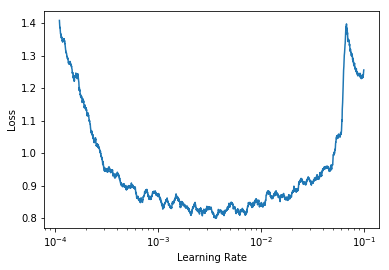

In [95]:
learner.plot_lrs(50), min(learner.losses)

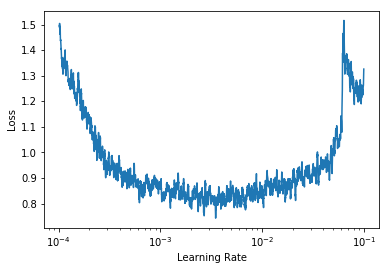

In [96]:
learner.plot_lrs(10)

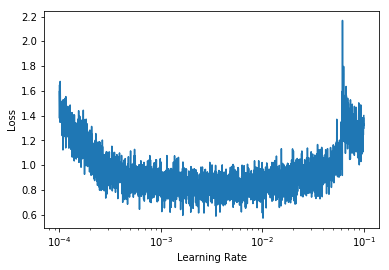

In [97]:
learner.plot_lrs(1)

In [98]:
del cfobj
torch.cuda.empty_cache()

In [99]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,pretrain_wts,emb_cols,emb_szs,dropout_e,hidden,dropouts,error_type="mse")
cfobj=cfobj.to(device)

In [100]:
wd=1e-7

In [101]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=5e-4,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=0)

In [102]:
learner.run_epochs(dltrain,dlvalid,2)

Epoch:0 Learning rate 0.0005 Weight Decay 1e-07 Train Loss:0.8391026082044303                 Valid Loss:0.752217597668738 Train RMSE:0.9140364551961939 Valid RMSE:0.8662757331305122 Train MSE:0.8391026082044303 Valid MSE:0.752217597668738                 Train MAE:0.7277759090214247 Valid MAE:0.6862916960130871
Epoch:1 Learning rate 0.0005 Weight Decay 1e-07 Train Loss:0.7660335070679464                 Valid Loss:0.7371629892712663 Train RMSE:0.8742302014614701 Valid RMSE:0.857583882175275 Train MSE:0.7660335070679464 Valid MSE:0.7371629892712663                 Train MAE:0.6928733390503591 Valid MAE:0.6770457886064144


In [103]:
learner.run_epochs(dltrain,dlvalid,2)

Epoch:0 Learning rate 0.0005 Weight Decay 1e-07 Train Loss:0.7468196155250767                 Valid Loss:0.7322002495341289 Train RMSE:0.8631533690077915 Valid RMSE:0.8548006589550474 Train MSE:0.7468196155250767 Valid MSE:0.7322002495341289                 Train MAE:0.6831642209653119 Valid MAE:0.6742463672862333
Epoch:1 Learning rate 0.0005 Weight Decay 1e-07 Train Loss:0.7361637424314297                 Valid Loss:0.7289868443823226 Train RMSE:0.8569743249025252 Valid RMSE:0.8527842834132546 Train MSE:0.7361637424314297 Valid MSE:0.7289868443823226                 Train MAE:0.6777213587996835 Valid MAE:0.672586297440102


In [104]:
learner.run_epochs(dltrain,dlvalid,1)

Epoch:0 Learning rate 0.0005 Weight Decay 1e-07 Train Loss:0.7288165578016477                 Valid Loss:0.7271951079521033 Train RMSE:0.8526784778299563 Valid RMSE:0.8516959090932459 Train MSE:0.7288165578016477 Valid MSE:0.7271951079521033                 Train MAE:0.6739431611509326 Valid MAE:0.6728832930555124


In [105]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=1e-4,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=7e-4,end_lr=5e-5)
learner.run_epochs(dltrain,dlvalid,7)

Epoch:0 Learning rate 0.0001 Weight Decay 1e-07 Train Loss:0.7140892805584053                 Valid Loss:0.7243582205394344 Train RMSE:0.8440796696159268 Valid RMSE:0.8500456363366945 Train MSE:0.7140892805584053 Valid MSE:0.7243582205394344                 Train MAE:0.6667425584176199 Valid MAE:0.6700061276135847
Epoch:1 Learning rate 7.071067811865475e-05 Weight Decay 1e-07 Train Loss:0.7114183128574947                 Valid Loss:0.7236719104030248 Train RMSE:0.8424765580319834 Valid RMSE:0.8496904436392037 Train MSE:0.7114183128574947 Valid MSE:0.7236719104030248                 Train MAE:0.6651058407002022 Valid MAE:0.6694323646138086
Epoch:2 Learning rate 5e-05 Weight Decay 1e-07 Train Loss:0.7088145846360646                 Valid Loss:0.723516471093268 Train RMSE:0.840948418724761 Valid RMSE:0.8494708619177677 Train MSE:0.7088145846360646 Valid MSE:0.723516471093268                 Train MAE:0.6638442663635284 Valid MAE:0.6690876685140078
Epoch:3 Learning rate 0.0001 Weight Decay

In [106]:
learner.run_epochs(dltrain,dlvalid,7)

Epoch:0 Learning rate 4.9999999999999996e-05 Weight Decay 1e-07 Train Loss:0.7027345424878655                 Valid Loss:0.72255153058435 Train RMSE:0.8372330747206433 Valid RMSE:0.8489863227764667 Train MSE:0.7027345424878655 Valid MSE:0.72255153058435                 Train MAE:0.6606276168686306 Valid MAE:0.667627753504097
Epoch:1 Learning rate 0.0001 Weight Decay 1e-07 Train Loss:0.7031551391894688                 Valid Loss:0.7225275779014353 Train RMSE:0.8375465563916671 Valid RMSE:0.8489909259376249 Train MSE:0.7031551391894688 Valid MSE:0.7225275779014353                 Train MAE:0.6608689849370577 Valid MAE:0.6674274097928001
Epoch:2 Learning rate 9.170040432046713e-05 Weight Decay 1e-07 Train Loss:0.7038063506765531                 Valid Loss:0.7222062788351112 Train RMSE:0.8379327560206803 Valid RMSE:0.8487213547981786 Train MSE:0.7038063506765531 Valid MSE:0.7222062788351112                 Train MAE:0.6608586658426805 Valid MAE:0.6686154841766943
Epoch:3 Learning rate 8.40

In [65]:
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=5e-4,end_lr=5e-5)

In [66]:
learner.run_epochs(dltrain,dlvalid,5)

Epoch:0 Learning rate 0.0005 Weight Decay 1e-07 Train Loss:0.6983296742111118                 Valid Loss:0.7299318895925342 Train RMSE:0.8336646761277289 Valid RMSE:0.8520167959032968 Train MSE:0.6983296742111118 Valid MSE:0.7299318895925342                 Train MAE:0.655270375060303 Valid MAE:0.6670203588883895
Epoch:1 Learning rate 0.00015811388300841897 Weight Decay 1e-07 Train Loss:0.6930723973863345                 Valid Loss:0.7295505566441495 Train RMSE:0.8305058226667925 Valid RMSE:0.8521040519811933 Train MSE:0.6930723973863345 Valid MSE:0.7295505566441495                 Train MAE:0.6525451888591284 Valid MAE:0.6681801718671608
Epoch:2 Learning rate 5e-05 Weight Decay 1e-07 Train Loss:0.6908287684117072                 Valid Loss:0.7297753081525988 Train RMSE:0.8290647174336147 Valid RMSE:0.852091234435171 Train MSE:0.6908287684117072 Valid MSE:0.7297753081525988                 Train MAE:0.6513407515221803 Valid MAE:0.6675846653673655
Epoch:3 Learning rate 0.0005 Weight Dec

In [68]:
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=5e-3,end_lr=5e-4)

In [69]:
learner.run_epochs(dltrain,dlvalid,5)

Epoch:0 Learning rate 0.00015811388300841897 Weight Decay 1e-07 Train Loss:0.689194224504697                 Valid Loss:0.7293706377372717 Train RMSE:0.8281919337249284 Valid RMSE:0.8520463187428251 Train MSE:0.689194224504697 Valid MSE:0.7293706377372717                 Train MAE:0.6504072137701381 Valid MAE:0.6678032109042262
Epoch:1 Learning rate 0.00028117066259517455 Weight Decay 1e-07 Train Loss:0.6901765814990962                 Valid Loss:0.7299710985873361 Train RMSE:0.8286961782186953 Valid RMSE:0.852274648325708 Train MSE:0.6901765814990962 Valid MSE:0.7299710985873361                 Train MAE:0.650951702810361 Valid MAE:0.6663980159308295
Epoch:2 Learning rate 0.0005 Weight Decay 1e-07 Train Loss:0.6920888002712391                 Valid Loss:0.7300850755494573 Train RMSE:0.8298888944868874 Valid RMSE:0.8523616414013031 Train MSE:0.6920888002712391 Valid MSE:0.7300850755494573                 Train MAE:0.6519921043935142 Valid MAE:0.6669936724331068
Epoch:3 Learning rate 0.

In [70]:
torch.save(cfobj,f=f'{DATAPATH}/inter/cf_plus_tl_model')
torch.save(learner,f=f'{DATAPATH}/inter/cf_plus_tl_learner')
torch.save(optimizer,f=f'{DATAPATH}/inter/cf_plus_tl_optimizer')
torch.save(cfobj.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_state_dict')
torch.save(optimizer.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_optimizer_state_dict')

In [72]:
df_train.head().T

,0,1,2,3,4
userId,3908,1254,1467,4717,1789
itemId,2347,1541,2617,3754,2997
rating,4,2,3,3,5
timestamp,965941231,974823280,977173059,963502544,974700402
gender,M,F,M,M,M
age,25,18,25,45,1
occupation,0,1,5,17,10
zip,10021,02144,97007,48310,19116
title,"Pope of Greenwich Village, The (1984)",Addicted to Love (1997),"Mummy, The (1999)","Adventures of Rocky and Bullwinkle, The (2000)",Being John Malkovich (1999)
genre,Action,Comedy|Romance,Action|Adventure|Horror|Thriller,Animation|Children's|Comedy,Comedy


In [180]:
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=4e-4,end_lr=4e-5)

In [181]:
learner.run_epochs(dltrain,dlvalid,5)

Epoch:0 Learning rate 0.0004 Weight Decay 1e-07 Train Loss:0.7085841895971904                 Valid Loss:0.7400470947289406 Train RMSE:0.8397724017164323 Valid RMSE:0.85807563937078 Train MSE:0.7085841895971904 Valid MSE:0.7400470947289406                 Train MAE:0.6619035640600885 Valid MAE:0.6723562184806979
Epoch:1 Learning rate 0.00012649110640673518 Weight Decay 1e-07 Train Loss:0.6798945998765829                 Valid Loss:0.7379258986934066 Train RMSE:0.8225438637391805 Valid RMSE:0.8568596157406778 Train MSE:0.6798945998765829 Valid MSE:0.7379258986934066                 Train MAE:0.6468499570504439 Valid MAE:0.6719082392695005
Epoch:2 Learning rate 4e-05 Weight Decay 1e-07 Train Loss:0.6643356711125791                 Valid Loss:0.7378187339629054 Train RMSE:0.8130279397105312 Valid RMSE:0.8566577295047599 Train MSE:0.6643356711125791 Valid MSE:0.7378187339629054                 Train MAE:0.6387030012438414 Valid MAE:0.6708499585728511
Epoch:3 Learning rate 0.0004 Weight Dec

In [182]:
torch.save(cfobj,f=f'{DATAPATH}/inter/cf_plus_tl_model')
torch.save(learner,f=f'{DATAPATH}/inter/cf_plus_tl_learner')
torch.save(optimizer,f=f'{DATAPATH}/inter/cf_plus_tl_optimizer')
torch.save(cfobj.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_state_dict')
torch.save(optimizer.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_optimizer_state_dict')

/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [169]:
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=5e-4,end_lr=5e-5)

In [170]:
learner.run_epochs(dltrain,dlvalid,6)

Epoch:0 Learning rate 0.0005 Weight Decay 1e-07 Train Loss:0.6941850676096538                 Valid Loss:0.7433338718646018 Train RMSE:0.8311313092989665 Valid RMSE:0.8599301569925202 Train MSE:0.6941850676096538 Valid MSE:0.7433338718646018                 Train MAE:0.654575018786645 Valid MAE:0.6774439708808498
Epoch:1 Learning rate 0.00015811388300841897 Weight Decay 1e-07 Train Loss:0.6689964935329719                 Valid Loss:0.7434683173056453 Train RMSE:0.8158519026145334 Valid RMSE:0.8600390302833822 Train MSE:0.6689964935329719 Valid MSE:0.7434683173056453                 Train MAE:0.6416919659952952 Valid MAE:0.6729949602233175
Epoch:2 Learning rate 5e-05 Weight Decay 1e-07 Train Loss:0.6554071987512592                 Valid Loss:0.7456495886492303 Train RMSE:0.8075521838911383 Valid RMSE:0.8610663575701407 Train MSE:0.6554071987512592 Valid MSE:0.7456495886492303                 Train MAE:0.6345673236181806 Valid MAE:0.6730673684336036
Epoch:3 Learning rate 0.0005 Weight De